<a href="https://colab.research.google.com/github/KilovoIt/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Stepan_DS18_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [2]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [3]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv',
                 parse_dates=['created'],
                 index_col='created')


In [5]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48818 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   description           47393 non-null  object 
 3   display_address       48685 non-null  object 
 4   latitude              48818 non-null  float64
 5   longitude             48818 non-null  float64
 6   price                 48818 non-null  int64  
 7   street_address        48808 non-null  object 
 8   interest_level        48818 non-null  object 
 9   elevator              48818 non-null  int64  
 10  cats_allowed          48818 non-null  int64  
 11  hardwood_floors       48818 non-null  int64  
 12  dogs_allowed          48818 non-null  int64  
 13  doorman               48818 non-null  int64  
 14  dishwasher            48818 non-nul

DatetimeIndex(['2016-04-01 22:12:41', '2016-04-01 22:56:00',
               '2016-04-01 22:57:15', '2016-04-01 23:26:07',
               '2016-04-02 00:48:13', '2016-04-02 01:11:13',
               '2016-04-02 01:11:30', '2016-04-02 01:11:31',
               '2016-04-02 01:11:34', '2016-04-02 01:11:40',
               ...
               '2016-06-29 17:32:19', '2016-06-29 17:35:09',
               '2016-06-29 17:37:20', '2016-06-29 17:38:02',
               '2016-06-29 17:39:08', '2016-06-29 17:47:34',
               '2016-06-29 17:56:12', '2016-06-29 18:14:48',
               '2016-06-29 18:30:41', '2016-06-29 21:41:47'],
              dtype='datetime64[ns]', name='created', length=48818, freq=None)

In [8]:
y = df['price']
X = df[['bedrooms']]

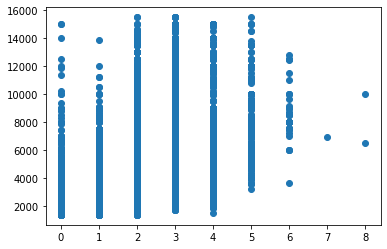

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X, y);

In [10]:
cutoff = '2016-06-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_val, y_val = X.loc[~mask], y.loc[~mask]

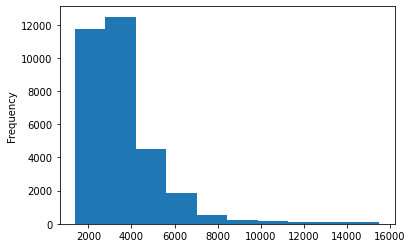

In [11]:
y_train.plot(kind='hist')

In [12]:
baseline_guess = y_train.mean()
mean_abs_err = abs(y_train - baseline_guess).mean()


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_[0]

855.5060260304634

In [14]:
lr.intercept_

2268.0853918830353

In [1]:
import numpy as np

X_model = np.linspace(0, X_train['bedrooms'].max(), 50).reshape(-1,1)
y_pred = lr.predict(X_model)

plt.scatter(X_train, y_train)

plt.plot(X_model, y_pred, color='red', label='model')
plt.show()

NameError: ignored